In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [141]:
df = pd.read_csv("titanic.csv")

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Gender       891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [143]:
df[:5]

,PassengerId,Name,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [144]:
df = df.drop(columns=["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin", "Embarked"])

In [145]:
df[:5]

,Pclass,Gender,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [146]:
# The total number of survived
df["Survived"].sum()

342

In [147]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [148]:
import seaborn as sns

<Axes: xlabel='Survived', ylabel='count'>

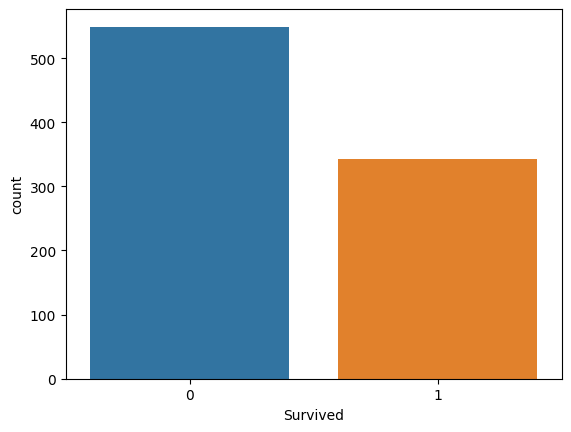

In [149]:
sns.countplot(x=df["Survived"])

In [150]:
dfm = df[["Gender", "Survived"]].groupby("Gender").value_counts()

In [151]:
dfm

Gender  Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [152]:
pivot_table = pd.pivot_table(df, values=["Survived"], index=["Gender"], columns=["Pclass"], aggfunc=np.mean)

In [153]:
df["Survived"].count()

891

In [154]:
pivot_percent = pivot_table / df["Survived"].sum()

In [155]:
pivot_table 

Survived                    
Pclass         1         2         3
Gender                              
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<Axes: ylabel='Gender'>

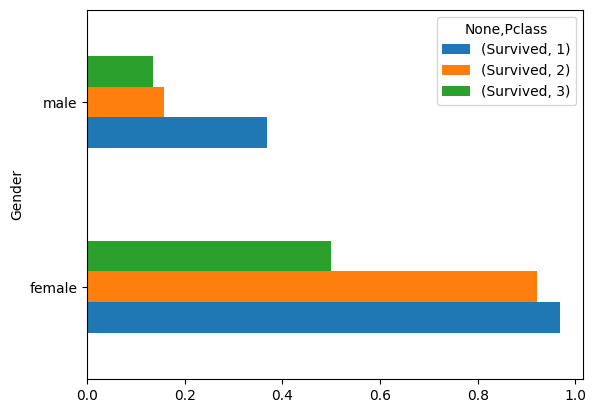

In [156]:
pivot_table.plot.barh()

<Axes: ylabel='Gender'>

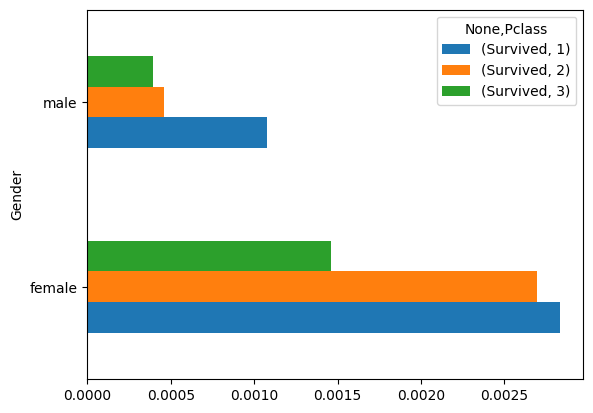

In [157]:
pivot_percent.plot.barh()

In [158]:
df['age_bins'] = pd.cut(x=df['Age'], bins=[0, 18, 36, 54,
                                          72, 90])

In [159]:
survival_rate = df.pivot_table(index=['Pclass'], columns=['age_bins','Gender'], values='Survived', aggfunc=np.sum)


In [160]:
survival_rate

age_bins (0, 18]      (18, 36]      (36, 54]      (54, 72]      (72, 90]     
Gender    female male   female male   female male   female male   female male
Pclass                                                                       
1             10    4       38   19       27   14        7    2        0    1
2             14    9       40    4       13    1        1    1        0    0
3             22   11       23   24        1    3        1    0        0    0

Text(0, 0.5, 'Price')

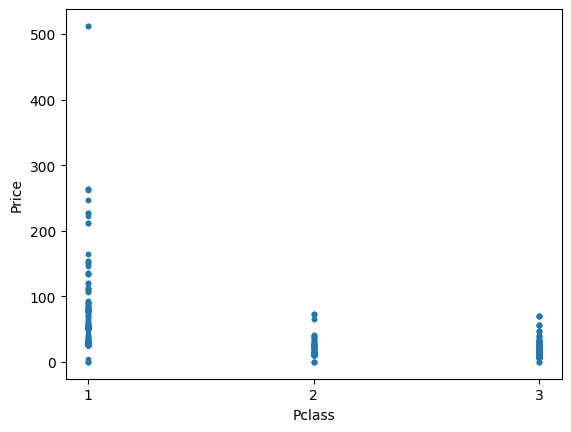

In [161]:
plt.scatter(y = df["Fare"], x = df["Pclass"], marker='.')
plt.xticks([1,2,3])
plt.xlabel("Pclass")
plt.ylabel("Price")

In [162]:
df_class = df["Survived"]

In [163]:
df = df.drop(columns=["Survived", "age_bins"])

In [164]:
df.head()

,Pclass,Gender,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [171]:
df.iloc[:,1:2]

,Gender
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [175]:
df

,Pclass,Gender,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [202]:
df_new = pd.get_dummies(df, columns=["Gender"], dtype=int)

In [203]:
df_new.head()

,Pclass,Age,Fare,Gender_female,Gender_male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [204]:
df_new.describe()

,Pclass,Age,Fare,Gender_female,Gender_male
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.352413,0.647587
std,0.836071,14.526497,49.693429,0.477990,0.477990
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,7.910400,0.000000,0.000000
50%,3.000000,28.000000,14.454200,0.000000,1.000000
75%,3.000000,38.000000,31.000000,1.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000,1.000000


In [205]:
df_new.isnull().sum()

Pclass             0
Age              177
Fare               0
Gender_female      0
Gender_male        0
dtype: int64

In [208]:
df_new["Age"] = df_new["Age"].fillna(np.mean(df_new["Age"]))

In [209]:
df_new

,Pclass,Age,Fare,Gender_female,Gender_male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
...,...,...,...,...,...
886,2,27.000000,13.0000,0,1
887,1,19.000000,30.0000,1,0
888,3,29.699118,23.4500,1,0
889,1,26.000000,30.0000,0,1


In [210]:
correlation_matrix = df_new.corr()

In [211]:
df_new.isnull().sum()

Pclass           0
Age              0
Fare             0
Gender_female    0
Gender_male      0
dtype: int64

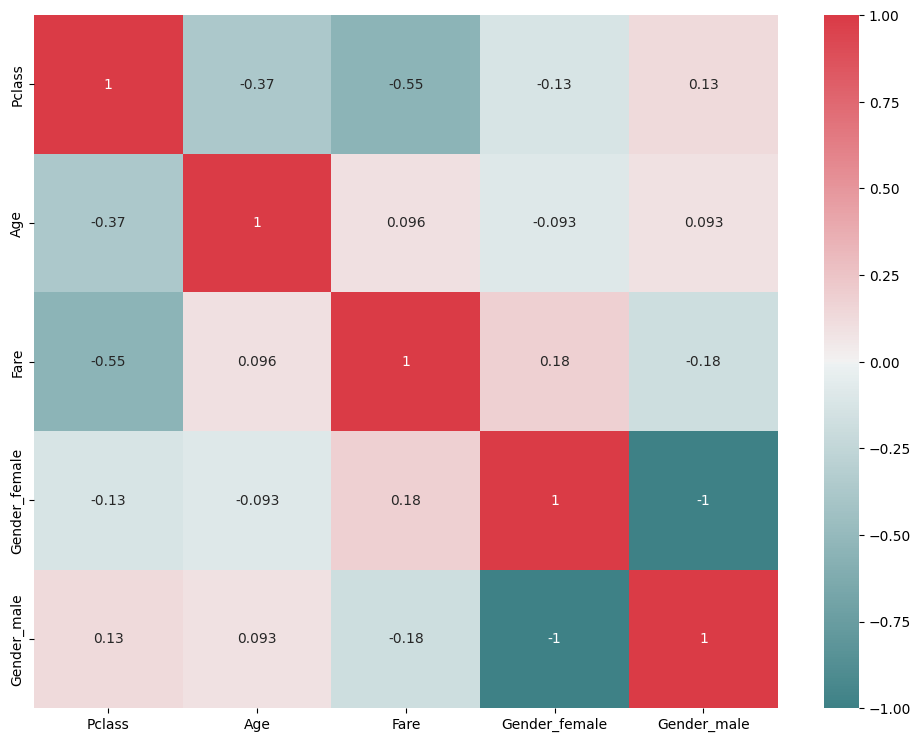

In [195]:
plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True))
plt.show()

In [270]:
df_new

,Pclass,Age,Fare,Gender_female,Gender_male,age_category
0,3,22.000000,7.2500,0,1,Young
1,1,38.000000,71.2833,1,0,MiddleAge
2,3,26.000000,7.9250,1,0,Young
3,1,35.000000,53.1000,1,0,MiddleAge
4,3,35.000000,8.0500,0,1,MiddleAge
...,...,...,...,...,...,...
886,2,27.000000,13.0000,0,1,MiddleAge
887,1,19.000000,30.0000,1,0,Young
888,3,29.699118,23.4500,1,0,NaN
889,1,26.000000,30.0000,0,1,Young


<Axes: xlabel='Age', ylabel='Count'>

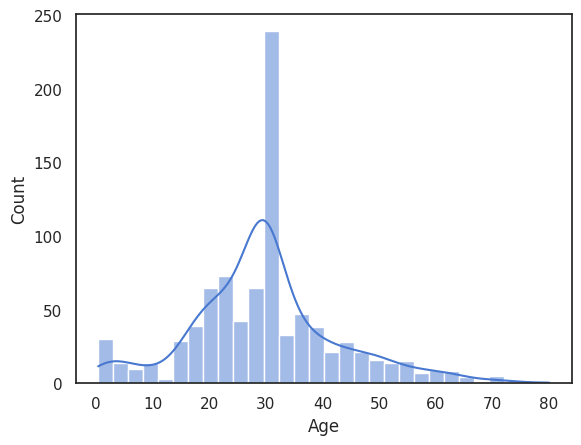

In [218]:
sns.histplot(df_new["Age"], kde = True)

<Axes: xlabel='Fare', ylabel='Count'>

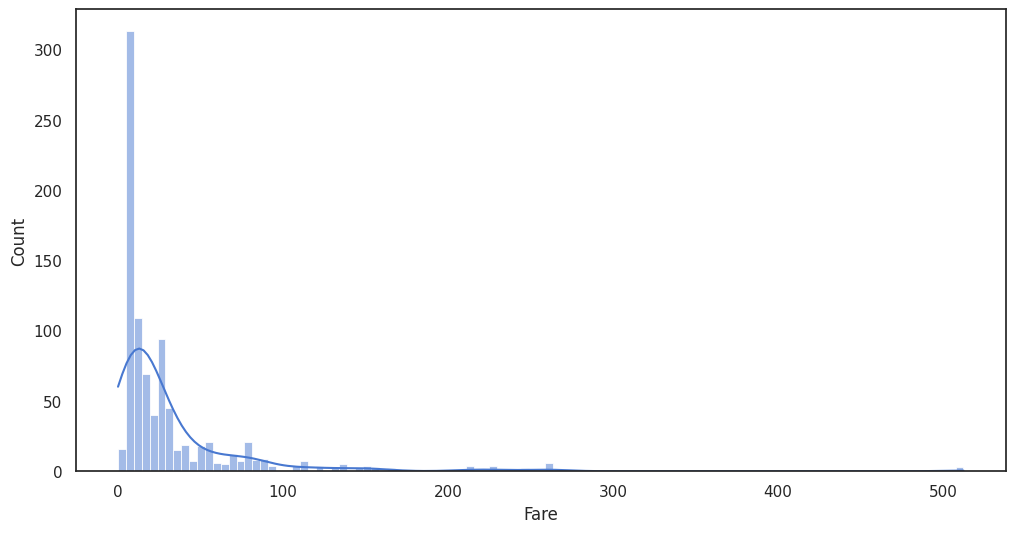

In [223]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(df_new["Fare"], kde=True, ax=ax)


In [224]:
from sklearn.model_selection import train_test_split

In [225]:
x_train, x_test , y_train, y_test = train_test_split(df_new, df_class, random_state=20, test_size=0.2)

In [227]:
x_train[:10]

,Pclass,Age,Fare,Gender_female,Gender_male
811,3,39.000000,24.1500,0,1
29,3,29.699118,7.8958,0,1
49,3,18.000000,17.8000,1,0
105,3,28.000000,7.8958,0,1
616,3,34.000000,14.4000,0,1
533,3,29.699118,22.3583,1,0
270,1,29.699118,31.0000,0,1
664,3,20.000000,7.9250,0,1
557,1,29.699118,227.5250,0,1
540,1,36.000000,71.0000,1,0


In [229]:
y_train[:10]

811    0
29     0
49     0
105    0
616    0
533    1
270    0
664    1
557    0
540    1
Name: Survived, dtype: int64

In [230]:
from sklearn.naive_bayes import GaussianNB

In [232]:
gnb = GaussianNB()

In [246]:
y_pred = gnb.fit(x_train, y_train).predict(x_test)

In [247]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1])

In [248]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

In [249]:
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)


Accuracy: 0.8268156424581006
F1 Score: 0.8282812695318448


In [252]:
probabilities = gnb.predict_proba(x_test[:10])

In [253]:
probabilities

array([[0.11694119, 0.88305881],
       [0.97378037, 0.02621963],
       [0.96693841, 0.03306159],
       [0.987228  , 0.012772  ],
       [0.04865409, 0.95134591],
       [0.60324279, 0.39675721],
       [0.98683394, 0.01316606],
       [0.98935496, 0.01064504],
       [0.00950848, 0.99049152],
       [0.98919333, 0.01080667]])

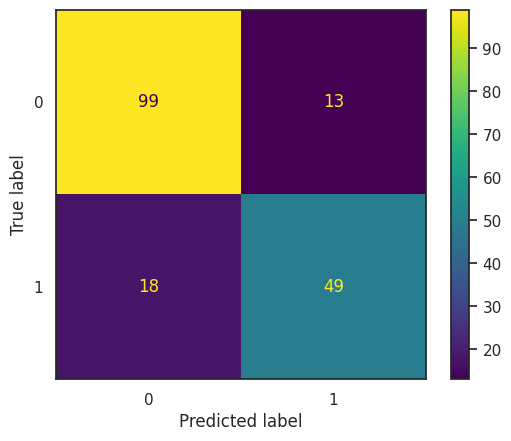

In [260]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [261]:
cm

array([[99, 13],
       [18, 49]])

<Axes: >

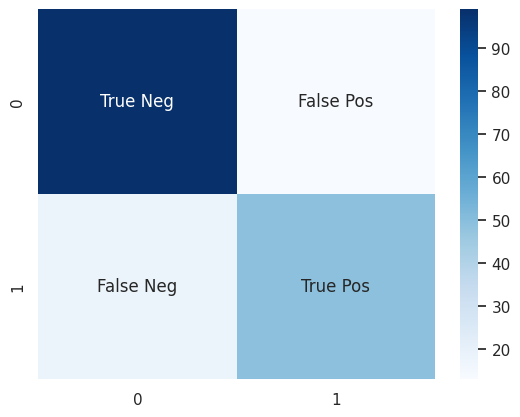

In [263]:
cm = confusion_matrix(y_test, y_pred)
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot=labels, fmt="", cmap='Blues')

In [264]:
df_new

,Pclass,Age,Fare,Gender_female,Gender_male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
...,...,...,...,...,...
886,2,27.000000,13.0000,0,1
887,1,19.000000,30.0000,1,0
888,3,29.699118,23.4500,1,0
889,1,26.000000,30.0000,0,1


In [271]:
df_new_category = df_new

In [273]:
df_new_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Pclass         891 non-null    int64   
 1   Age            891 non-null    float64 
 2   Fare           891 non-null    float64 
 3   Gender_female  891 non-null    int64   
 4   Gender_male    891 non-null    int64   
 5   age_category   714 non-null    category
dtypes: category(1), float64(2), int64(3)
memory usage: 35.9 KB


In [274]:
num_bins = 3  # Number of desired bins
bin_labels = ["Young", "MiddleAge", "Old"]

In [275]:
df_new_category['age_category'] = pd.cut(df_new_category['Age'], bins=num_bins, labels=bin_labels)


In [286]:
df_new_category

,Pclass,Age,Fare,Gender_female,Gender_male,age_category,fare_category
0,3,22.000000,7.2500,0,1,Young,Cheap
1,1,38.000000,71.2833,1,0,MiddleAge,Cheap
2,3,26.000000,7.9250,1,0,Young,Cheap
3,1,35.000000,53.1000,1,0,MiddleAge,Cheap
4,3,35.000000,8.0500,0,1,MiddleAge,Cheap
...,...,...,...,...,...,...,...
886,2,27.000000,13.0000,0,1,MiddleAge,Cheap
887,1,19.000000,30.0000,1,0,Young,Cheap
888,3,29.699118,23.4500,1,0,MiddleAge,Cheap
889,1,26.000000,30.0000,0,1,Young,Cheap


In [287]:
df_new_category["fare_category"] = pd.qcut(df_new_category["Fare"], 5)

In [288]:
df_new_category["age_category"] = pd.qcut(df_new_category["Age"], 5)

In [289]:
df_new_category

,Pclass,Age,Fare,Gender_female,Gender_male,age_category,fare_category
0,3,22.000000,7.2500,0,1,"(20.0, 28.0]","(-0.001, 7.854]"
1,1,38.000000,71.2833,1,0,"(29.699, 38.0]","(39.688, 512.329]"
2,3,26.000000,7.9250,1,0,"(20.0, 28.0]","(7.854, 10.5]"
3,1,35.000000,53.1000,1,0,"(29.699, 38.0]","(39.688, 512.329]"
4,3,35.000000,8.0500,0,1,"(29.699, 38.0]","(7.854, 10.5]"
...,...,...,...,...,...,...,...
886,2,27.000000,13.0000,0,1,"(20.0, 28.0]","(10.5, 21.679]"
887,1,19.000000,30.0000,1,0,"(0.419, 20.0]","(21.679, 39.688]"
888,3,29.699118,23.4500,1,0,"(28.0, 29.699]","(21.679, 39.688]"
889,1,26.000000,30.0000,0,1,"(20.0, 28.0]","(21.679, 39.688]"


In [ ]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB(force_alpha=True)
clf.fit(x_train, y_train)